![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

**Análisis Descriptivo Variable Season**

A través del análisis de la variable Season se observan comportamientos particulares según cada estación:


*   En verano el promedio de alquiler de bicicletas es mayor, la temporada de menor alquiler promedio de bicicletas es invierno.
*   En promedio se rentan 118 bicicletas más en verano que en invierno.
*   Se observa que en todos los días de la muestra se alquiló por lo menos una bicicleta

Según los percentiles, la distibución de la cantidad de bicicletas rentadas es sesgada a la derecha para todas las temporadas




In [7]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


season
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: total, dtype: object

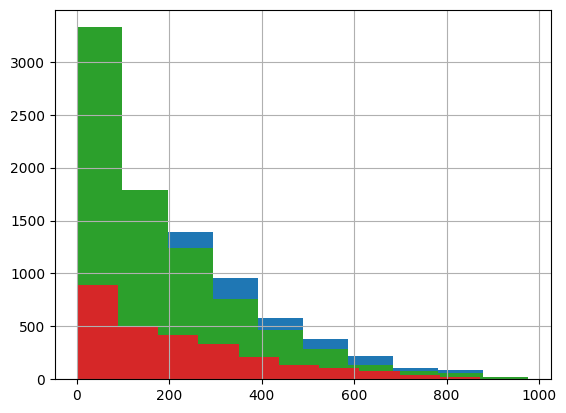

In [8]:
bikes.groupby(bikes['season'] == 1).total.hist()
bikes.groupby(bikes['season'] == 2).total.hist()


season
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: total, dtype: object

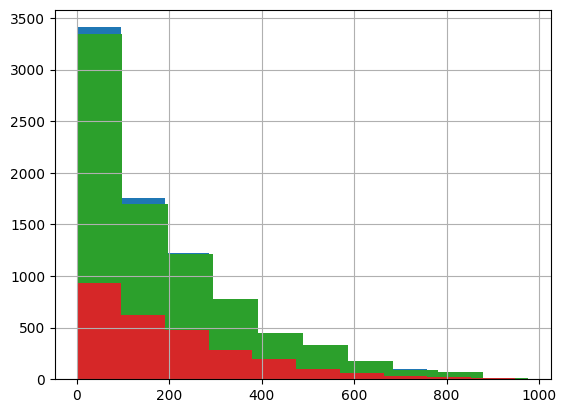

In [9]:
bikes.groupby(bikes['season'] == 3).total.hist()
bikes.groupby(bikes['season'] == 4).total.hist()


**Análisis Descriptivo Variable Hour**
A través del análisis de la variable Hour se observan diferentes patrones según la franja horaria del día:


*   Se presenta baja demanda de alquiler entre las 22 y las 6 horas del día siguiente.
*   Se presenta alta demanda del alquiler entre las 7 am y las 22 horas.
* La franja de mayor demanda de alquiler se da entre las 17 y las 19 horas.



In [10]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


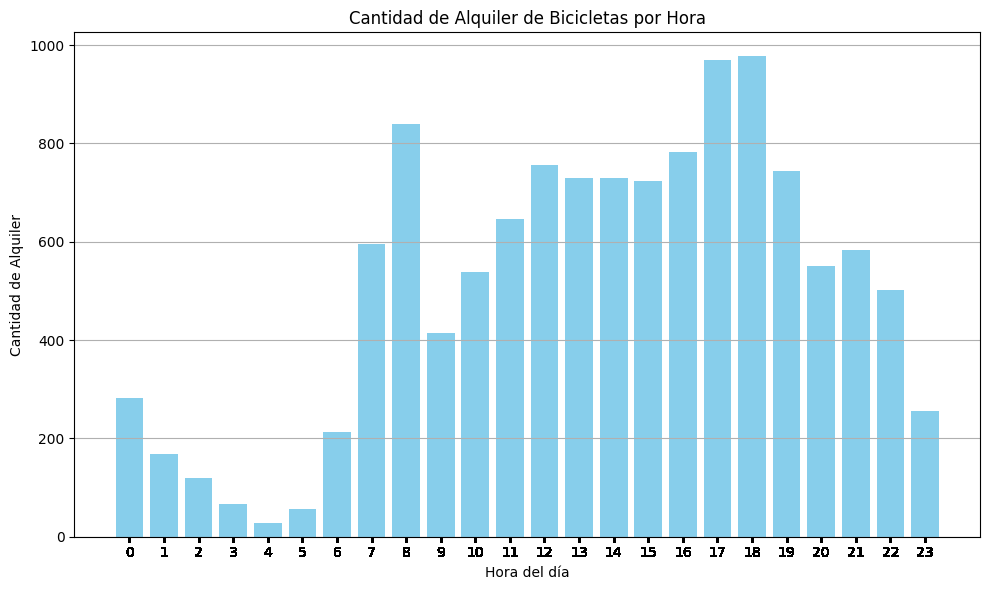

In [11]:
import matplotlib.pyplot as plt

# Datos de cantidad promedio de alquiler de bicicletas por hora
horas = bikes['hour']
cantidad_promedio = bikes['total']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(horas, cantidad_promedio, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de Alquiler')
plt.title('Cantidad de Alquiler de Bicicletas por Hora')

# Añadir etiquetas a los ejes x
plt.xticks(horas)

# Mostrar el gráfico
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

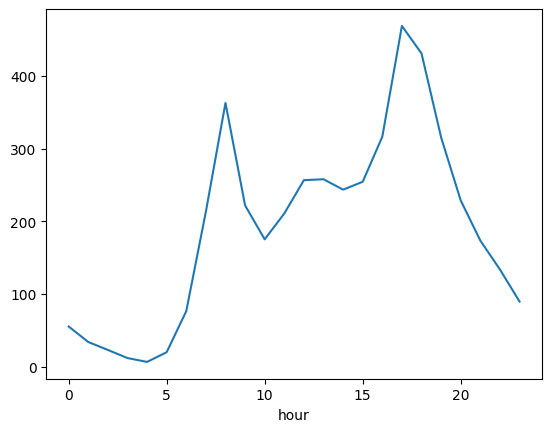

In [12]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

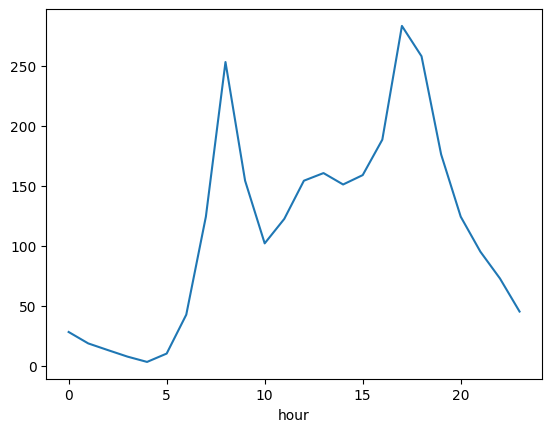

In [15]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

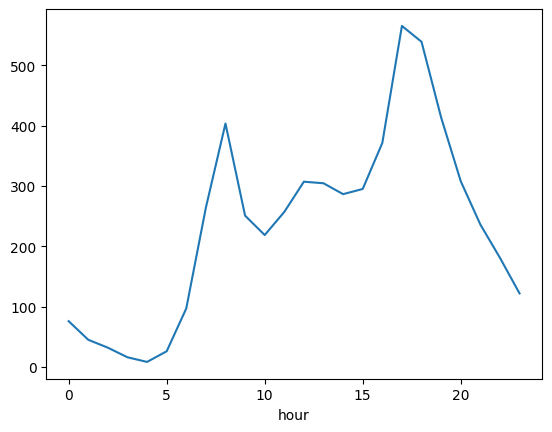

In [16]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot()

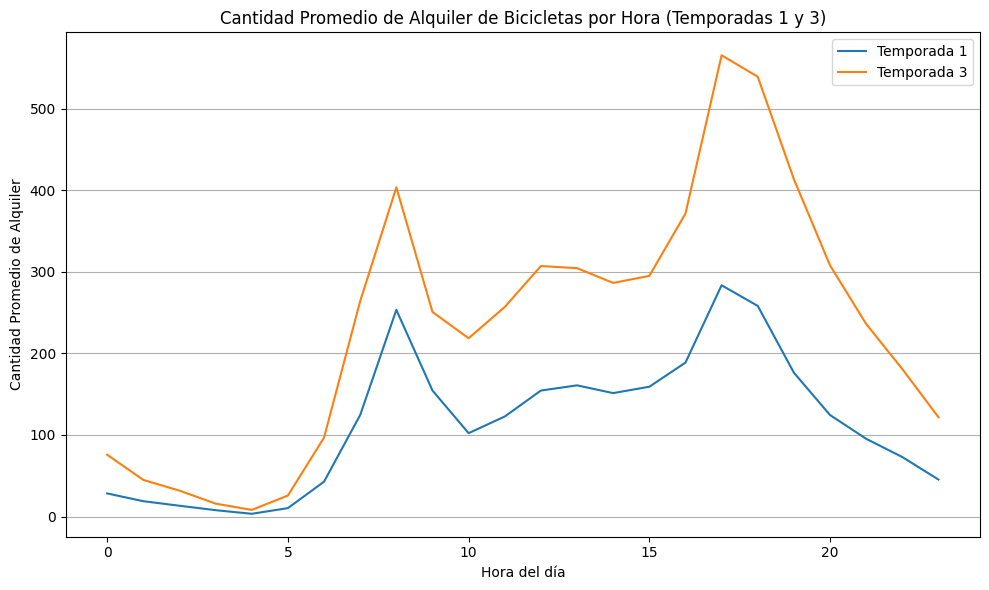

In [17]:
import matplotlib.pyplot as plt

# Filtrar y agrupar los datos por hora y calcular la media para la temporada 1
data_season_1 = bikes[bikes['season'] == 1].groupby('hour')['total'].mean()

# Filtrar y agrupar los datos por hora y calcular la media para la temporada 3
data_season_3 = bikes[bikes['season'] == 3].groupby('hour')['total'].mean()

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar la serie para la temporada 1
plt.plot(data_season_1.index, data_season_1.values, label='Temporada 1')

# Graficar la serie para la temporada 3
plt.plot(data_season_3.index, data_season_3.values, label='Temporada 3')

# Añadir etiquetas y título
plt.xlabel('Hora del día')
plt.ylabel('Cantidad Promedio de Alquiler')
plt.title('Cantidad Promedio de Alquiler de Bicicletas por Hora (Temporadas 1 y 3)')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# ***Análisis***

Entre las dos temporadas, invierno y verano se observa el mismo patrón por horas del día, la tendencia del alquiler es muy similar. En lo que se observa diferencia importante es en la cantidad promedio de alquiler, de manera consistente para todas las franjas horarias en invierno la cantidad es inferior a la cantidad en verano.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [18]:
# Celda 3

# Importar librerías
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Definición de datos para entrenamiento y evaluación
X = bikes[["hour", "season"]]
y = bikes[["total"]]

# Ajuste de modelo Regresión Lineal
LinReg= LinearRegression()
LinReg.fit(X, y)
prediccion = LinReg.predict(X)

# Resultados del modelo
print("Coeficientes del modelo de regresión lineal: ", LinReg.coef_)    #Coeficientes
# R^2
print ("Coeficiente de determinación R^2 del modelo: ", LinReg.score(X, y, sample_weight=None))
# MSE
print ("MSE del modelo: ", mean_squared_error(y,prediccion))

Coeficientes del modelo de regresión lineal:  [[10.52129824 26.95130851]]
Coeficiente de determinación R^2 del modelo:  0.18805882759715697
MSE del modelo:  26640.03254457677


***Coeficientes del modelo:*** obtenemos que el coeficiente asociado a "hour" es aproximadamente 10.52, entonces manteniendo constante la estación, el número de alquileres de bicicletas aumenta en promedio 10.52 unidades por cada hora adicional. Y el coeficiente asociado a "season" es aproximadamente 26.95, lo que indica que, manteniendo constante la hora, el número total de alquileres de bicicletas aumenta en promedio en 26.95 unidades en una estación diferente.

***R^2:*** se obtiene un valor bajo que nos indica que sólo el 18,8% de la variabilidad del modelo puede ser explicada por las variables predictoras incluidas.

***MSE:***  el valor obtenido es alto, las predicciones del modelo están bastantes desviadas según el error obtenido.

En este caso el modelo de regresión lineal no tiene muy buen resultado teniendo en cuenta el bajo valor de R^2 y el alto valor de MSE. Se tendrían que explorar otros modelos para capturar mejor la complejidad de los datos porque vemos que este modelo resulta limitado.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [21]:
# Celda 4

# Importar librería para calcular MSE
from sklearn.metrics import mean_squared_error

# Definición de la función calcular_mse
def calcular_mse(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    y_l_pred = [y_l.mean()[0] for i in range(len(y_l))]
    y_r_pred = [y_r.mean()[0] for i in range(len(y_r))]

    mse_valor = mean_squared_error(y_l, y_l_pred) + mean_squared_error(y_r, y_r_pred)
    return mse_valor

# Definición de la función best_split
def best_split(X, y, num_pct):
    features = range(X.shape[1])

    best_split = [0, 0, 1000000000]  # j, split, MSE

    # Para todas las variables
    j = 0
    splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
    splits = np.unique(splits)[1:]

    # Para cada partición
    for split in splits:
        MSE = calcular_mse(X.iloc[:, j], y, split)

        if MSE < best_split[2]:
            best_split = [j, split, MSE]

    return best_split


#### Desarrollo manual del árbol

num_pct = 12   # Definición de percentiles para la variable "hour"

## Primer nivel -> Partición por "season" 1 en rama izquierda, 2 en rama derecha

# Partición en nodo inicial sobre la variable "season"
filtro_izq = X["season"] == 1
X_season_1_N1 = X.loc[filtro_izq]
y_season_1_N1 = y.loc[filtro_izq]

# Partición en nodo inicial sobre la variable "season"
filtro_izq = X["season"] == 2
X_season_2_N1 = X.loc[filtro_izq]
y_season_2_N1 = y.loc[filtro_izq]

## Desarrollo del árbol para season = 1

## Segundo nivel

# Mejor partición izquierda primer nivel de season = 1
mejor_particion = best_split(X_season_1_N1, y_season_1_N1, num_pct)
print('Mejor partición izquierda segundo nivel de season = 1. Feature: "',  X.iloc[:,mejor_particion[0]].name, '" ; partición en: ',
     mejor_particion[1], '; MSE(izq+der): ', mejor_particion[2])

filtro_izq = X_season_1_N1["hour"] <= 9
X_season_1_N2_izq = X_season_1_N1.loc[filtro_izq]
y_season_1_N2_izq = y_season_1_N1.loc[filtro_izq]

filtro_der = X_season_1_N1["hour"] > 9
X_season_1_N2_der = X_season_1_N1.loc[filtro_der]
y_season_1_N2_der = y_season_1_N1.loc[filtro_der]

## Tercer nivel

# Mejor partición izquierda segundo nivel de season = 1
mejor_particion = best_split(X_season_1_N2_der, y_season_1_N2_der, num_pct)
print('Mejor partición izquierda tercer nivel de season = 1. Feature: "',  X.iloc[:,mejor_particion[0]].name, '" ; partición en: ',
     mejor_particion[1], '; MSE(izq+der): ', mejor_particion[2], '\n')

filtro_izq = X_season_1_N1["hour"] <= 22
X_season_1_N3_izq = X_season_1_N2_der.loc[filtro_izq]
y_season_1_N3_izq = y_season_1_N2_der.loc[filtro_izq]

filtro_der = X_season_1_N1["hour"] > 22
X_season_1_N3_der = X_season_1_N2_der.loc[filtro_der]
y_season_1_N3_der = y_season_1_N2_der.loc[filtro_der]

### Desarrollo del árbol para season = 2
## Segundo nivel

# Mejor partición izquierda primer nivel de season = 2
mejor_particion = best_split(X_season_2_N1, y_season_2_N1, num_pct)
print('Mejor partición izquierda segundo nivel de season = 2. Feature: "',  X.iloc[:,mejor_particion[0]].name, '" ; partición en: ',
     mejor_particion[1], '; MSE(izq+der): ', mejor_particion[2])

filtro_izq = X_season_2_N1["hour"] <= 9
X_season_2_N2_izq = X_season_2_N1.loc[filtro_izq]
y_season_2_N2_izq = y_season_2_N1.loc[filtro_izq]

filtro_der = X_season_2_N1["hour"] > 9
X_season_2_N2_der = X_season_2_N1.loc[filtro_der]
y_season_2_N2_der = y_season_2_N1.loc[filtro_der]

## Tercer nivel

# Mejor partición izquierda segundo nivel de season = 2
mejor_particion = best_split(X_season_2_N2_der, y_season_2_N2_der, num_pct)
print('Mejor partición izquierda tercer nivel de season = 2. Feature: "',  X.iloc[:,mejor_particion[0]].name, '" ; partición en: ',
     mejor_particion[1], '; MSE(izq+der): ', mejor_particion[2], '\n')

filtro_izq = X_season_2_N1["hour"] <= 22
X_season_2_N3_izq = X_season_2_N2_der.loc[filtro_izq]
y_season_2_N3_izq = y_season_2_N2_der.loc[filtro_izq]

filtro_der = X_season_2_N1["hour"] > 22
X_season_2_N3_der = X_season_2_N2_der.loc[filtro_der]
y_season_2_N3_der = y_season_2_N2_der.loc[filtro_der]

### Desarrollo del árbol para season = 3
## Segundo nivel

# Partición en nodo inicial sobre la variable "season"
filtro_izq = X["season"] == 3
X_season_3_N1 = X.loc[filtro_izq]
y_season_3_N1 = y.loc[filtro_izq]

# Mejor partición izquierda primer nivel de season = 3
mejor_particion = best_split(X_season_3_N1, y_season_3_N1, num_pct)
print('Mejor partición izquierda segundo nivel de season = 3. Feature: "',  X.iloc[:,mejor_particion[0]].name, '" ; partición en: ',
     mejor_particion[1], '; MSE(izq+der): ', mejor_particion[2])

filtro_izq = X_season_3_N1["hour"] <= 9
X_season_3_N2_izq = X_season_3_N1.loc[filtro_izq]
y_season_3_N2_izq = y_season_3_N1.loc[filtro_izq]

filtro_der = X_season_3_N1["hour"] > 9
X_season_3_N2_der = X_season_3_N1.loc[filtro_der]
y_season_3_N2_der = y_season_3_N1.loc[filtro_der]

## Tercer nivel

# Mejor partición izquierda segundo nivel de season = 3
mejor_particion = best_split(X_season_3_N2_der, y_season_3_N2_der, num_pct)
print('Mejor partición izquierda tercer nivel de season = 3. Feature: "',  X.iloc[:,mejor_particion[0]].name, '" ; partición en: ',
     mejor_particion[1], '; MSE(izq+der): ', mejor_particion[2], '\n')

filtro_izq = X_season_3_N1["hour"] <= 22
X_season_3_N3_izq = X_season_3_N2_der.loc[filtro_izq]
y_season_3_N3_izq = y_season_3_N2_der.loc[filtro_izq]

filtro_der = X_season_3_N1["hour"] > 22
X_season_3_N3_der = X_season_3_N2_der.loc[filtro_der]
y_season_3_N3_der = y_season_3_N2_der.loc[filtro_der]


### Desarrollo del árbol para season = 4
## Segundo nivel

# Partición en nodo inicial sobre la variable "season"
filtro_izq = X["season"] == 4
X_season_4_N1 = X.loc[filtro_izq]
y_season_4_N1 = y.loc[filtro_izq]

# Mejor partición izquierda primer nivel de season = 4
mejor_particion = best_split(X_season_4_N1, y_season_4_N1, num_pct)
print('Mejor partición izquierda segundo nivel de season = 4. Feature: "',  X.iloc[:,mejor_particion[0]].name, '" ; partición en: ',
     mejor_particion[1], '; MSE(izq+der): ', mejor_particion[2])

filtro_izq = X_season_4_N1["hour"] <= 9
X_season_4_N2_izq = X_season_4_N1.loc[filtro_izq]
y_season_4_N2_izq = y_season_4_N1.loc[filtro_izq]

filtro_der = X_season_4_N1["hour"] > 9
X_season_4_N2_der = X_season_4_N1.loc[filtro_der]
y_season_4_N2_der = y_season_4_N1.loc[filtro_der]

## Tercer nivel

# Mejor partición izquierda segundo nivel de season = 4
mejor_particion = best_split(X_season_4_N2_der, y_season_4_N2_der, num_pct)
print('Mejor partición izquierda tercer nivel de season = 4. Feature: "',  X.iloc[:,mejor_particion[0]].name, '" ; partición en: ',
     mejor_particion[1], '; MSE(izq+der): ', mejor_particion[2], '\n')

filtro_izq = X_season_4_N1["hour"] <= 22
X_season_4_N3_izq = X_season_4_N2_der.loc[filtro_izq]
y_season_4_N3_izq = y_season_4_N2_der.loc[filtro_izq]

filtro_der = X_season_4_N1["hour"] > 22
X_season_4_N3_der = X_season_4_N2_der.loc[filtro_der]
y_season_4_N3_der = y_season_4_N2_der.loc[filtro_der]





Mejor partición izquierda segundo nivel de season = 1. Feature: " hour " ; partición en:  1.0 ; MSE(izq+der):  16533.51410913729
Mejor partición izquierda tercer nivel de season = 1. Feature: " hour " ; partición en:  22.0 ; MSE(izq+der):  17485.399329103242 

Mejor partición izquierda segundo nivel de season = 2. Feature: " hour " ; partición en:  7.0 ; MSE(izq+der):  33938.10786909715
Mejor partición izquierda tercer nivel de season = 2. Feature: " hour " ; partición en:  22.0 ; MSE(izq+der):  36238.85879415889 

Mejor partición izquierda segundo nivel de season = 3. Feature: " hour " ; partición en:  7.0 ; MSE(izq+der):  34817.49690071953
Mejor partición izquierda tercer nivel de season = 3. Feature: " hour " ; partición en:  22.0 ; MSE(izq+der):  36089.1331349817 

Mejor partición izquierda segundo nivel de season = 4. Feature: " hour " ; partición en:  7.0 ; MSE(izq+der):  29724.946518302233
Mejor partición izquierda tercer nivel de season = 4. Feature: " hour " ; partición en:  2

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

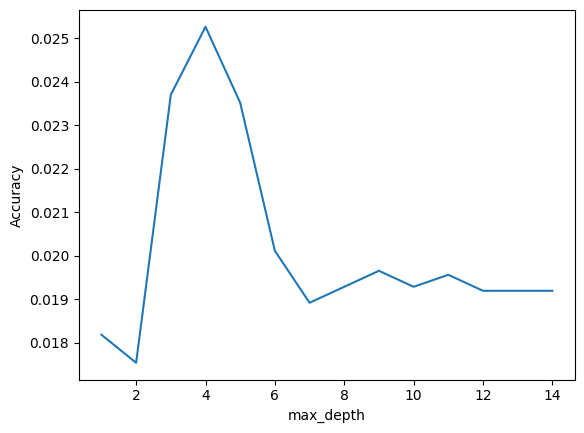

El MSE del modelo es: 23067.33363953702


,feature,importance
1,season,0.294659
0,hour,0.705341


In [22]:
# Celda 5

# Importar Matplotlib
import matplotlib.pyplot as plt

# Definición de datos para entrenamiento y evaluación
X = bikes[["hour", "season"]]
y = bikes[["total"]]

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 15)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clfTree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clfTree, X, y, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

# max_depth=11 fue el mejor, se ajusta un árbol usando este valor
clfTree = DecisionTreeClassifier(max_depth=11, random_state=1)
clfTree.fit(X, y)
prediccion = clfTree.predict(X)

print('El MSE del modelo es:', mean_squared_error(y,prediccion))
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
pd.DataFrame({'feature':X.columns, 'importance':clfTree.feature_importances_}).sort_values('importance')


***Análisis de Resultados***

Comparando el MSE de los modelos de regresión lineal (MSE_RL = 26640) y de árbol de decisión (MSE_AD = 23067), se encuentra que este último tiene mejor desempeño. Este resultado está asociado a:

- La flexibilidad que tienen los árboles de decisión para segmentar los valores de los predictores.
- En las gráficas del _Punto 2_ se identificó un comportamiento no lineal en la variable de salida, por lo cual se identifica que un modelo de Regresión Lineal no tendría buen desempeño.
- En el modelo, el predictor 'hour' tiene mayor importancia que 'season'.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [23]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [24]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [25]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

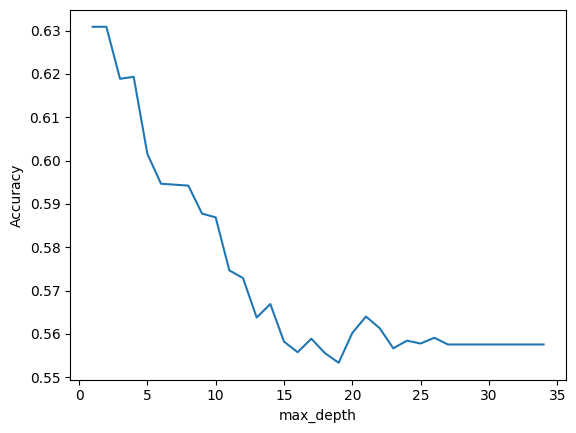

- Modelo de Árbol de decisión
El modelo con mejor Accuracy se obtiene con un árbol de profundidad igual a 2
El F1 Score del modelo de Árbol de decisión es:  0.6448598130841121
El Accuracy del modelo de Árbol de decisión es:  0.6453333333333333 

Los predictores relevantes del modelo son kw_avg_avg y kw_max_avg  

                feature  importance
26           kw_avg_avg    0.900096
25           kw_max_avg    0.099904
0             timedelta    0.000000
31   weekday_is_tuesday    0.000000
33  weekday_is_thursday    0.000000


- Modelo de Regresión logística
El F1 Score del modelo de Regresión logística es:  0.6129476584022039
El Accuracy del modelo de Regresión logística es:  0.6253333333333333


- Modelo de Regresión logística con solo predictores relevantes identificados en modelo Árbol de decisión
El F1 Score del modelo de Regresión logística con predictores relevantes es:  0.6705150976909415
El Accuracy del modelo de Regresión logística con predictores relevantes es:  0.5053333333

In [27]:
# Celda 6

# Importación de modelos y métricas de sklearn
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# Importar Matplotlib
import matplotlib.pyplot as plt


#### Modelo Árbol de decisión

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 35)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clfTree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clfTree, X_train, y_train, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

# max_depth=2 fue el mejor, se ajusta un árbol usando este valor
clfTree = DecisionTreeClassifier(max_depth=2, random_state=1)
clfTree.fit(X_train, y_train)
prediccionTree = clfTree.predict(X_test)

print('- Modelo de Árbol de decisión')
print('El modelo con mejor Accuracy se obtiene con un árbol de profundidad igual a 2')
print('El F1 Score del modelo de Árbol de decisión es: ', f1_score(y_test, prediccionTree))
print('El Accuracy del modelo de Árbol de decisión es: ', accuracy_score(y_test, prediccionTree), '\n')
print ('Los predictores relevantes del modelo son kw_avg_avg y kw_max_avg  \n')

# Uso de la función .feature_importances_ para obtener la importancia de cada variable
print(pd.DataFrame({'feature':X_train.columns, 'importance':clfTree.feature_importances_}).sort_values('importance', ascending=False).head())


#### Modelo de regresión logística

clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(X_train, y_train)
prediccionesRegLog=clfRegLog.predict(X_test)

print('\n')
print('- Modelo de Regresión logística')
print('El F1 Score del modelo de Regresión logística es: ', f1_score(y_test, prediccionesRegLog))
print('El Accuracy del modelo de Regresión logística es: ', accuracy_score(y_test, prediccionesRegLog))

clfRegLog.fit(X_train[["kw_avg_avg", "kw_max_avg"]], y_train)
prediccionesRegLog=clfRegLog.predict(X_test[["kw_avg_avg", "kw_max_avg"]])

print('\n')
print('- Modelo de Regresión logística con solo predictores relevantes identificados en modelo Árbol de decisión')
print('El F1 Score del modelo de Regresión logística con predictores relevantes es: ', f1_score(y_test, prediccionesRegLog))
print('El Accuracy del modelo de Regresión logística con predictores relevantes es: ', accuracy_score(y_test, prediccionesRegLog))


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

Nota:

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [28]:
# Celda 7
# Importar librerías
from sklearn.ensemble import BaggingClassifier

# Uso de BaggingRegressor con modelo Árbol de decisión

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=1, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred_arbol_1a = clf.predict(X_test)

print('Resultados del Punto 7 \n')
print('- Modelo Árbol de decisión')
print('El F1 Score del modelo Árbol de decisión es: ', f1_score(y_test, y_pred_arbol_1a))
print('El Accuracy del modelo Árbol de decisión es: ', accuracy_score(y_test, y_pred_arbol_1a), '\n')


# Uso de BaggingRegressor con modelo Árbol de decisión de dos niveles

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=1, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred_arbol_2a = clf.predict(X_test)

print('- Modelo Árbol de decisión de dos niveles')
print('El F1 Score del modelo Árbol de decisión de dos niveles es: ', f1_score(y_test, y_pred_arbol_2a))
print('El Accuracy del modelo Árbol de decisión de dos niveles es: ', accuracy_score(y_test, y_pred_arbol_2a), '\n')


# Uso de BaggingRegressor con Modelo Regresión logística

clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=1, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred_RegLog_a = clf.predict(X_test)

print('- Modelo Regresión logística')
print('El F1 Score del modelo de Regresión logística es: ', f1_score(y_test, y_pred_RegLog_a))
print('El Accuracy del modelo de Regresión logística es: ', accuracy_score(y_test, y_pred_RegLog_a), '\n')



Resultados del Punto 7 

- Modelo Árbol de decisión
El F1 Score del modelo Árbol de decisión es:  0.6486120514556534
El Accuracy del modelo Árbol de decisión es:  0.654 

- Modelo Árbol de decisión de dos niveles
El F1 Score del modelo Árbol de decisión de dos niveles es:  0.6426630434782609
El Accuracy del modelo Árbol de decisión de dos niveles es:  0.6493333333333333 

- Modelo Regresión logística
El F1 Score del modelo de Regresión logística es:  0.610770279481936
El Accuracy del modelo de Regresión logística es:  0.6193333333333333 



### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [31]:
# Celda 8
# Importar librerías
from sklearn import metrics

# Uso de BaggingRegressor con modelo Árbol de decisión

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=1, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)

alpha = (1 - errors) / (1 - errors).sum()
y_pred_arbol_1b = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)

print('Resultados del Punto 8 \n')
print('- Modelo Árbol de decisión')
print('El F1 Score del modelo Árbol de decisión es: ', f1_score(y_test, y_pred_arbol_1b))
print('El Accuracy del modelo Árbol de decisión es: ', accuracy_score(y_test, y_pred_arbol_1b), '\n')


# Uso de BaggingRegressor con modelo Árbol de decisión de dos niveles

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=1, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)

alpha = (1 - errors) / (1 - errors).sum()
y_pred_arbol_2b = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)

print('- Modelo Árbol de decisión de dos niveles')
print('El F1 Score del modelo Árbol de decisión de dos niveles es: ', f1_score(y_test, y_pred_arbol_2b))
print('El Accuracy del modelo Árbol de decisión de dos niveles es: ', accuracy_score(y_test, y_pred_arbol_2b), '\n')


# Uso de BaggingRegressor con Modelo Regresión logística

clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=1, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)

alpha = (1 - errors) / (1 - errors).sum()
y_pred_RegLog_b = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)

print('- Modelo Regresión logística')
print('El F1 Score del modelo de Regresión logística es: ', f1_score(y_test, y_pred_RegLog_b))
print('El Accuracy del modelo de Regresión logística es: ', accuracy_score(y_test, y_pred_RegLog_b), '\n')

Resultados del Punto 8 

- Modelo Árbol de decisión
El F1 Score del modelo Árbol de decisión es:  0.6416893732970027
El Accuracy del modelo Árbol de decisión es:  0.6493333333333333 

- Modelo Árbol de decisión de dos niveles
El F1 Score del modelo Árbol de decisión de dos niveles es:  0.6422267481330619
El Accuracy del modelo Árbol de decisión de dos niveles es:  0.6486666666666666 

- Modelo Regresión logística
El F1 Score del modelo de Regresión logística es:  0.6152805949966192
El Accuracy del modelo de Regresión logística es:  0.6206666666666667 



### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

#### Análisis de resultados

Se realiza una gráfica comparativa entre los modelos de las métricas F1 y Accuracy y se obsrva que:

- De acuerdo con el resultado de las métricas F1 y Accuracy, el modelo de Árbol de decisión sin límite de profundidad tiene mejor desempeño que los demás modelos desarrollados en los puntos 7 y 8. Este modelo tiene la desventaja de requerir mayor tiempo de procesamiento computacional. No se aprecia una diferencia relevante entre el modelo con votación mayoritaria y el modelo con votación ponderada.
- A su vez, el segundo mejor modelo, es el Árbol de decisión con dos niveles de profundidad. Su desempeño es ligeramente inferior que el modelo sin límite en la profundidad, sin embargo, el tiempo de procesamiento computacional es menor. No se aprecia una diferencia relevante entre el modelo con votación mayoritaria y el modelo con votación ponderada.
- Por último, el modelo de Regresión logística obtuvo el menor desempeño de los modelos analizados. Sus métricas F1 y Accuracy están alrededor de 0.05 puntos por debajo del mejor modelo. Se destaca que el modelo con votación ponderada tuvo un desempeño ligeramente mejor frente al modelo con votación mayoritaria.

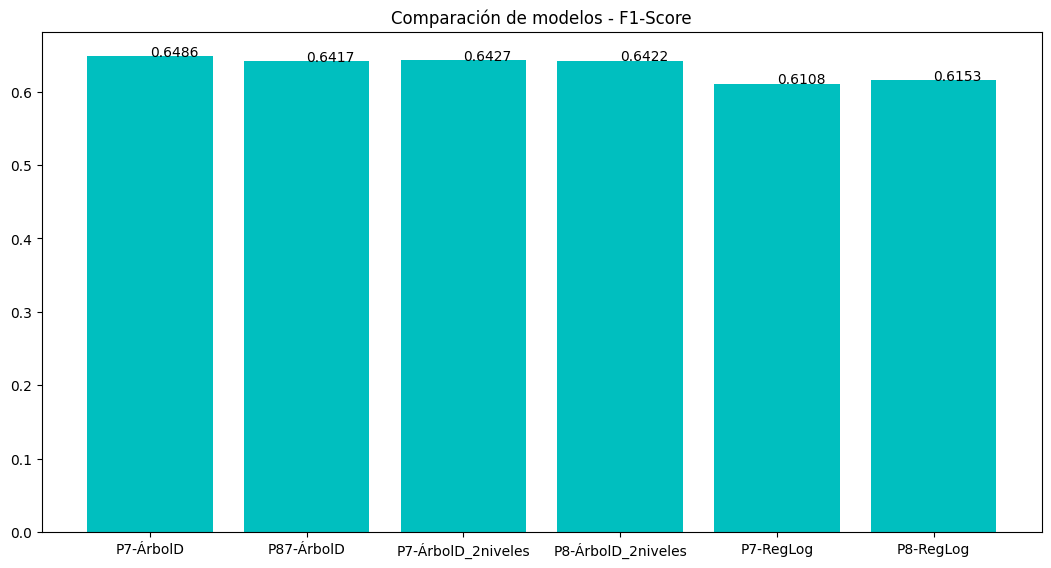

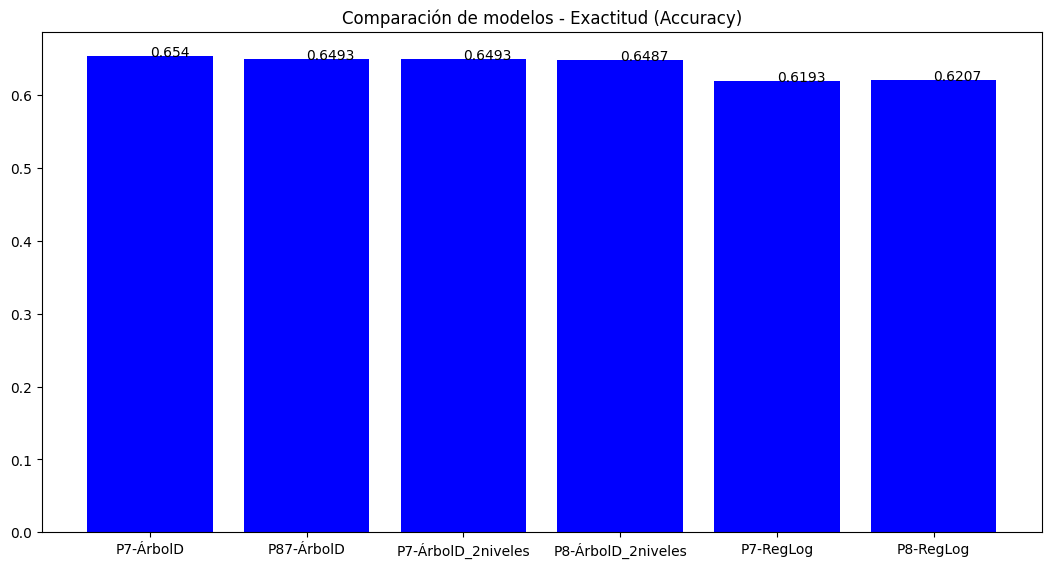

In [34]:
# Celda 9

### Gráfica para comparar F1-Score

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos - F1-Score")
ejeX = ['P7-ÁrbolD','P87-ÁrbolD','P7-ÁrbolD_2niveles','P8-ÁrbolD_2niveles','P7-RegLog','P8-RegLog']
ejeY = [round(f1_score(y_test, y_pred_arbol_1a),4), round(f1_score(y_test, y_pred_arbol_1b),4), round(f1_score(y_test, y_pred_arbol_2a),4),
        round(f1_score(y_test, y_pred_arbol_2b),4), round(f1_score(y_test, y_pred_RegLog_a),4), round(f1_score(y_test, y_pred_RegLog_b),4)]

ax.bar(ejeX,ejeY, color="c")
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Gráfica para comparar exactitud

fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos - Exactitud (Accuracy)")
ejeX = ['P7-ÁrbolD','P87-ÁrbolD','P7-ÁrbolD_2niveles','P8-ÁrbolD_2niveles','P7-RegLog','P8-RegLog']
ejeY = [round(accuracy_score(y_test, y_pred_arbol_1a),4), round(accuracy_score(y_test, y_pred_arbol_1b),4),
        round(accuracy_score(y_test, y_pred_arbol_2a),4), round(accuracy_score(y_test, y_pred_arbol_2b),4),
        round(accuracy_score(y_test, y_pred_RegLog_a),4), round(accuracy_score(y_test, y_pred_RegLog_b),4)]
ax.bar(ejeX,ejeY, color="b")
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()